<h1 style="color:green"><b> National Anthem Classifier </b></h1>

<h5>Importing Packages needed<h5>

In [104]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt',quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


<h5>Loading Dataset</h5>

In [105]:
#loading the csv file using pandas
data= pd.read_csv('national_anthems.csv')
#Creating Dataframes
df= pd.DataFrame(data)
print(df.head())

      Country Alpha-2 Alpha-3 Continent  \
0     Albania      AL     ALB    Europe   
1     Armenia      AM     ARM    Europe   
2     Austria      AT     AUT    Europe   
3  Azerbaijan      AZ     AZE    Europe   
4     Belarus      BY     BLR    Europe   

                                              Anthem  
0  Around our flag we stand united, With one wish...  
1  Our Fatherland, free, independent, That has fo...  
2  Land of mountains, land by the river, Land of ...  
3  Azerbaijan, Azerbaijan! The glorious Fatherlan...  
4  We, Belarusians, are peaceful people, Wholehea...  


<h5><b>Data Cleaning And Data Pre-processing</b></h5>
<p><span><b>Preprocessing the data</b><span>: The first step is to preprocess the data. The Kaggle dataset of National Anthems only contains the lyrics of national anthems in English. However, some of the lyrics may contain special characters or words that are not relevant for our classification task. Therefore, we need to remove them using techniques such as tokenization, stemming, and stopword removal.
<span><b>preprocessing consist of 5 steps</b><br>
<span><b>Substitution:-</b> </span>Substituting regex like speicial characters and digits with empty space<br> 
<span><b>Generalization:</b></span>Converting the texts to a generalized format here we are Generalizing text case<br>
<span><b>Tokenization:-</b></span>Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning.<br> 
<span><b>Stemming:-</b></span>Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas". Stemming is important in natural language understanding (NLU) and natural language processing (NLP) for example <span style="color:red">Chocolaty, chocolacious, choco, to Stemmed word Chocolate </b></span><br>
</p>


In [106]:
#preprocessing Data
def preprocess(text):
    #substituting speicial characters and digits with empty string
    text=re.sub('[^a-zA-Z]', ' ',text)
    #converting text to lowercase
    text= text.lower()
    #tokenizing the text
    words= word_tokenize(text)
    #removing stopwords and stemming words
    ps= PorterStemmer()
    words= [ps.stem(word) for word in words if not word in set(stopwords.words('english'))]
    #joining the words back into string 
    preprocessed_text=' '.join(words)
    return preprocessed_text

In [107]:

df['Anthem']=df['Anthem'].apply(preprocess)
print(df['Anthem'])


0      around flag stand unit one wish one goal sacr ...
1      fatherland free independ centuri live summon s...
2      land mountain land river land field land cathe...
3      azerbaijan azerbaijan gloriou fatherland valor...
4      belarusian peac peopl wholeheartedli devot mot...
                             ...                        
185    defend homeland ralli around glori time blood ...
186    oh uganda may god uphold thee lay futur thi ha...
187    son sahara battlefield torch holder long road ...
188    stand sing zambia proud free land work joy uni...
189    oh lift high banner flag zimbabw symbol freedo...
Name: Anthem, Length: 190, dtype: object


<h5><b>Feature Extraction</b></h5>
<p><b>Feature Extraction:</b>Feature extraction for machine learning and deep learning. Feature extraction refers to the process of transforming raw data <br>into numerical features that can be processed while preserving the information in the original data set.</h5>
<h5><b>TF-IDF VECTORIZER</b></h5>
<p>The word count from text documents is very basic at the starting point. However simple word count is not sufficient for text processing because of the words like “the”, “an”, “your”, etc. are highly occurred in text documents. Their large word count is meaningless towards the analysis of the text. Tf-idf can be successfully used for stop-words filtering from the text document.

The other way to solve this problem is word frequency. This method is called the TF-IDF stands for “Term Frequency – Inverse Document Frequency ”. TF-IDF is a numerical statistic which measures the importance of the word in a document.

<b>Term Frequency:</b> Number of time a word appears in a text document.<br>
<b>Inverse Document Frequency</b>: Measure the word is a rare word or common word in a document.</p>
<h5><b>TF-IDF VECTORIZER Formulae</b></h5>
<img src="Markdown_Images/tf-idf-1.png">


In [108]:
#Feature Extraction
tfidf= TfidfVectorizer()
features= tfidf.fit_transform(df['Anthem'])
print(features)


  (0, 2124)	0.14338689514763414
  (0, 2014)	0.13538290768262362
  (0, 975)	0.07932359754839449
  (0, 2116)	0.14338689514763414
  (0, 1660)	0.07667184564067149
  (0, 309)	0.0855319725520758
  (0, 1073)	0.06296999908505797
  (0, 1234)	0.166609994787231
  (0, 606)	0.08671608047169885
  (0, 2435)	0.10052811464317558
  (0, 2446)	0.09681295928558471
  (0, 921)	0.0879528323741804
  (0, 53)	0.3093357637622861
  (0, 2501)	0.15466788188114305
  (0, 1486)	0.05824301088854581
  (0, 2813)	0.10481694675059525
  (0, 2715)	0.15466788188114305
  (0, 2211)	0.06402002319509607
  (0, 747)	0.1812091685638068
  (0, 1663)	0.05420370813659845
  (0, 1080)	0.053830248346193744
  (0, 1418)	0.0458262608811832
  (0, 1829)	0.09681295928558471
  (0, 958)	0.10481694675059525
  (0, 2012)	0.15466788188114305
  :	:
  (189, 1376)	0.08660323991947767
  (189, 1505)	0.0535267509687927
  (189, 2117)	0.10445884590299705
  (189, 1197)	0.0838891325746468
  (189, 186)	0.0852104577994582
  (189, 1575)	0.3211605058127562
  (189, 8

<h3><b>Splitting:</b></h5>
<p>n machine learning, data splitting is typically done to avoid overfitting. That is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data.<br>

The original data in a machine learning model is typically taken and split into three or four sets. The three sets commonly used are the training set, the dev set and the testing set:<p>
<li>The <span style="color:red"><b>training set</b></span> is the portion of data used to train the model. The model should observe and learn from the training set, optimizing any of its parameters.</li>
<li>The <span style="color:red"><b>devset</b></span> is a data set of examples used to change learning process parameters. It is also called the cross-validation or model validation set. This set of data has the goal of ranking the model's accuracy and can help with model selection</li>
<li>The <span style="color:red"><b>testing set</b></span> is the portion of data that is tested in the final model and is compared against the previous sets of data. The testing set acts as an evaluation of the final mode and algorithm.</li>


In [109]:
#Splitting Data
X_train,X_test,y_train,y_test=train_test_split(features,df['Country'],test_size=0.2,random_state=42)

<h5><b>Training The Model</b></h5>
<p>The Model Chosen Here is<b>Logistic Regression Model</b></p>
<li><span><b>Logistic Regression Model:</b></span> is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables</li>
<li> Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.</li>
<li>Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.</li>
<li>In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).</li>
<li>Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets..</li>
<li>Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification. The below image is showing the logistic function:</li>
<img src="Markdown_Images/logistic-regression-in-machine-learning.png"><br>
<h8><b>Logistic Function(Sygmoid Function):</b></h8>
<li>The sigmoid function is a mathematical function used to map the predicted values to probabilities.</li>
<li>It maps any real value into another value within a range of 0 and 1.</li>
<li>The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function</li>
<li>In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0</li>
<h8><b>Equations Logistic Regression:</b></h8>
<li>The Logistic regression equation can be obtained from the Linear Regression equation. The mathematical steps to get Logistic Regression equations are given below:</li>
<img src="Markdown_Images/logistic-regression-in-machine-learning2.png">
<li>In Logistic Regression y can be between 0 and 1 only, so for this let's divide the above equation by (1-y):</li>
<img src="Markdown_Images/logistic-regression-in-machine-learning3.png">
<li>But we need range between -[infinity] to +[infinity], then take logarithm of the equation it will become:</li>
<img src="Markdown_Images/logistic-regression-in-machine-learning4.png">



In [110]:
#training The Model
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

<h5><b>Evaluating The Models</b><h5>

In [111]:
y_pred= model.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy",score)
# Predicting new data
new_data = ['You ancient, you free, you mountainous north You quiet, you joyfully beauty! I greet you, loveliest land upon Earth, Your sun, your sky, your green climes. You throne on memories of great olden days, When honoured your name flew across the Earth, I know that you are and will become what you were, Yes, I want to live, I want to die in the North. I always will serve you my beloved land, your fidelity to death I will swear. Your right, I shall defend, with mind and with hand, your banner, high with feats it carries. With God I shall fight, for home and for hearth, for Sweden, the beloved homeland Exchange you, I wont for anything in this world No, I want live, I want to die in the North']
new_data = tfidf.transform(new_data).toarray()
prediction = model.predict(new_data)
print('Prediction:', prediction)

Accuracy 0.0
Prediction: ['Sweden']


<h5><b>Classifying The Data and Prediction into Groups Using K-Means Clustering</b></h5>


0      0
1      3
2      4
3      4
4      1
      ..
185    2
186    4
187    3
188    1
189    1
Name: cluster, Length: 190, dtype: int32


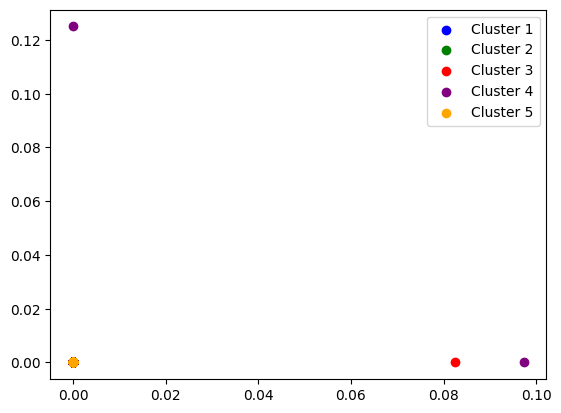

In [114]:
#Clustering The Data
kmeans= KMeans(n_clusters=5,random_state=0)
clusters= kmeans.fit_predict(features)
# Add Cluster to the lebel Database
df['cluster']=clusters
print(df['cluster'])
# Plot countries in different segments based on their clusters
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i in range(len(colors)):
    x = features[clusters == i, 0].toarray()
    y = features[clusters == i, 1].toarray()
    plt.scatter(x, y, c=colors[i], label='Cluster ' + str(i+1))

plt.legend()
plt.show()




